# PREDICTION OF AUTOMOTIVE ACCIDENT SEVERITY

* GENERAL

In [2]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import os
import csv

In [4]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* NEURAL NETWORK

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/Users/ewagerus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## DATA PREPROCESSING 

In [80]:
df1 = pd.read_csv('data/2014 excel.csv')
df2 = pd.read_csv('data/2015 excel.csv')
df3 = pd.read_csv('data/2016 excel.csv')

In [81]:
#merging files#
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [82]:
#deleting columns and data#
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)
result= result.dropna(axis=0)

In [83]:
result

,Number of Vehicles,Day,Time (24hr),Road Surface,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,Sunday,1840,Dry,Fine without high winds,Driver,Serious,Male,19,Car
1,1,Sunday,1840,Dry,Fine without high winds,Passenger,Serious,Male,19,Car
2,1,Saturday,130,Dry,Fine without high winds,Driver,Serious,Male,21,Car
3,1,Friday,235,Wet or Damp,Fine without high winds,Driver,Slight,Male,23,Car
4,2,Tuesday,240,Wet or Damp,Fine with high winds,Driver,Serious,Male,60,Goods vehicle 7.5 tonnes mgw and over
5,2,Tuesday,240,Wet or Damp,Fine with high winds,Driver,Serious,Male,41,Goods vehicle 7.5 tonnes mgw and over
6,2,Tuesday,240,Wet or Damp,Fine with high winds,Passenger,Slight,Male,61,Goods vehicle 7.5 tonnes mgw and over
7,2,Saturday,1728,Wet or Damp,Other,Driver,Slight,Male,26,Pedal cycle
8,1,Friday,2158,Snow,Snowing without high winds,Driver,Slight,Male,23,Car
9,1,Thursday,1840,Dry,Fine without high winds,Pedestrian,Slight,Male,7,Car


In [84]:
#listing objects#
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']
list11=['Driver', 'Driver ']
list12=['Pedestrian']

In [85]:
#listing day

def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)


#listing weather conditions#

def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

#listing type of vehicle

def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)


#listing Time

def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#listing Casualty Class

def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)

#Dummies
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

#dealing with columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)




In [86]:
result

,Number of Vehicles,Casualty Severity,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Dry,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,...,Weather Conditions_snowing,Casualty Class_Driver,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle,Type of Vehicle_other
0,1,Serious,19,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,1,Serious,19,1,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,Serious,21,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,1,Slight,23,1,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
4,2,Serious,60,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
5,2,Serious,41,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
6,2,Slight,61,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
7,2,Slight,26,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
8,1,Slight,23,1,1,0,0,0,1,0,...,1,1,0,0,1,0,1,0,0,0
9,1,Slight,7,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0


## DATA VISUALIZATION

## DECISION TREE

In [102]:
seed=12345
np.random.seed(seed)

In [103]:
#dividing into train and test datasets

from sklearn.model_selection import train_test_split
  
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [104]:
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 

87.0219054763691
87.0219054763691
86.85409685754773
86.85409685754773
86.45388013670085
86.42805701425355
86.23420855213804
85.9373343335834
85.67901975493875
85.25287988663833
84.85244644494458
84.32309744102693
83.664549470701
83.04464449445695
82.3086271567892
81.43065766441609
80.56534133533383
80.34606985079604
79.84244394431941


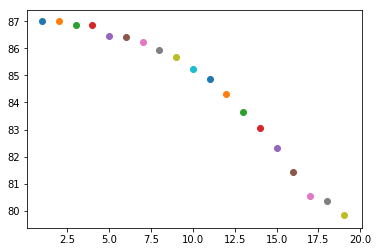

In [105]:


for i in range(1,20):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1)  
    tree .fit(X, y) 
    y_pred =tree .predict(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [111]:
from sklearn.tree import DecisionTreeClassifier  
tree = DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)

In [112]:
#defining the model evaluation procedure
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [113]:
score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 87.02% (standard deviation 1.22%)


In [114]:
importance = tree.feature_importances_
column_names = X.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 3 most important features in decision tree model are: '+str(important_features))


The 3 most important features in decision tree model are: ['Type of Vehicle_motorcycle', 'Type of Vehicle_other', 'Type of Vehicle_other']


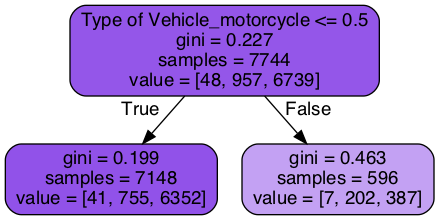

In [115]:
#Plotting decision tree

dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            out_file=None,
                            feature_names=list(X))  

graph=graph_from_dot_data(dot_data)

graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png', width=1000)

## STANDARDIZATION AND PCA ANALYSIS

In [116]:
#standardization 
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

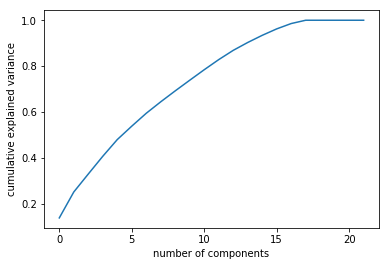

In [117]:
#choosing the number of components for PCA
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#the first 15 components contain approximately 90% of the variance

In [118]:
#PCA
pca = PCA(n_components=15)
X_2 = pca.fit_transform(X_1)

## NEURAL NETWORK

In [39]:
#one hot encoding
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.np_utils.to_categorical(encoded_y)

NameError: name 'LabelEncoder' is not defined

In [47]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(30, input_dim=15, activation='relu'))
    model.add(Dense(15, input_dim=30, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#“relu” activation function reduces likelihood of vanishing gradient
#using a “softmax” activation function ensuring that the output values are in the range of 0 and 1 and may be used as predicted probabilities
#when using the "categorical_crossentropy" loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample) 
#"Adam" optimizer realizes the benefits of both AdaGrad (Adaptive Gradient Algorithm) and RMSProp (Root Mean Square Propagation)

In [48]:
#define classifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#batch defines the number of samples to work through before updating the internal model parameters
#epoch defines the number of times that the learning algorithm will work through the entire training dataset
#verbose is a general programming term for produce lots of logging output; set to 0 (silent) not to slower the computation

In [50]:
#calculating results
results = cross_val_score(estimator, X_2, dummy_y, cv=kfold)

In [51]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results.mean()*100, results.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 85.83% (standard deviation 1.16%)


## KNN

79.6741852129699
73.45011252813202
83.61275318829709
81.90812703175794
85.1494707010086
84.60705176294073
85.92416437442694
85.6788363757606
86.29877469367342
85.96295740601818
86.51829624072684
86.49233975160456
86.68622155538884
86.62158873051598
86.8927898641327
86.77649412353088
86.71199466533301
86.71196132366426
86.90569308993916
86.78953071601234
86.85398016170709
86.89277319329832
86.95730599316495
86.94445277986163
86.95733933483372
86.97030924397765
86.93153288322083
86.90569308993915
86.86693340001668
86.81535383845961
86.85409685754773
86.78951404517797
86.8540468450446
86.72489789113946
86.85406351587896
86.77661081937151
86.72498124531133
86.73783445861464
86.7507543552555


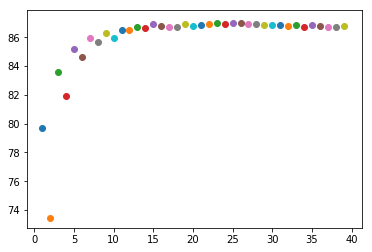

In [172]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric='minkowski')
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean=results3.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=26, p=2,
                               metric='minkowski')
knn.fit(X_2, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=26, p=2,
           weights='uniform')

In [174]:
results3 = cross_val_score(knn, X_2, y, cv=kfold)

In [175]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results3.mean()*100, results3.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 86.97% (standard deviation 1.02%)


## LOGISTIC REGRESSION

* using PCA

In [119]:
lr = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_2, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
results1 = cross_val_score(lr, X_2, y, cv=kfold)

In [121]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results1.mean()*100, results1.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 86.85% (standard deviation 1.24%)


* without PCA

In [142]:
X_3 = X.drop(['Road Surface_Dry', 'Weather Conditions_fine', 'Casualty Class_Driver', 'Type of Vehicle_other'], axis=1)

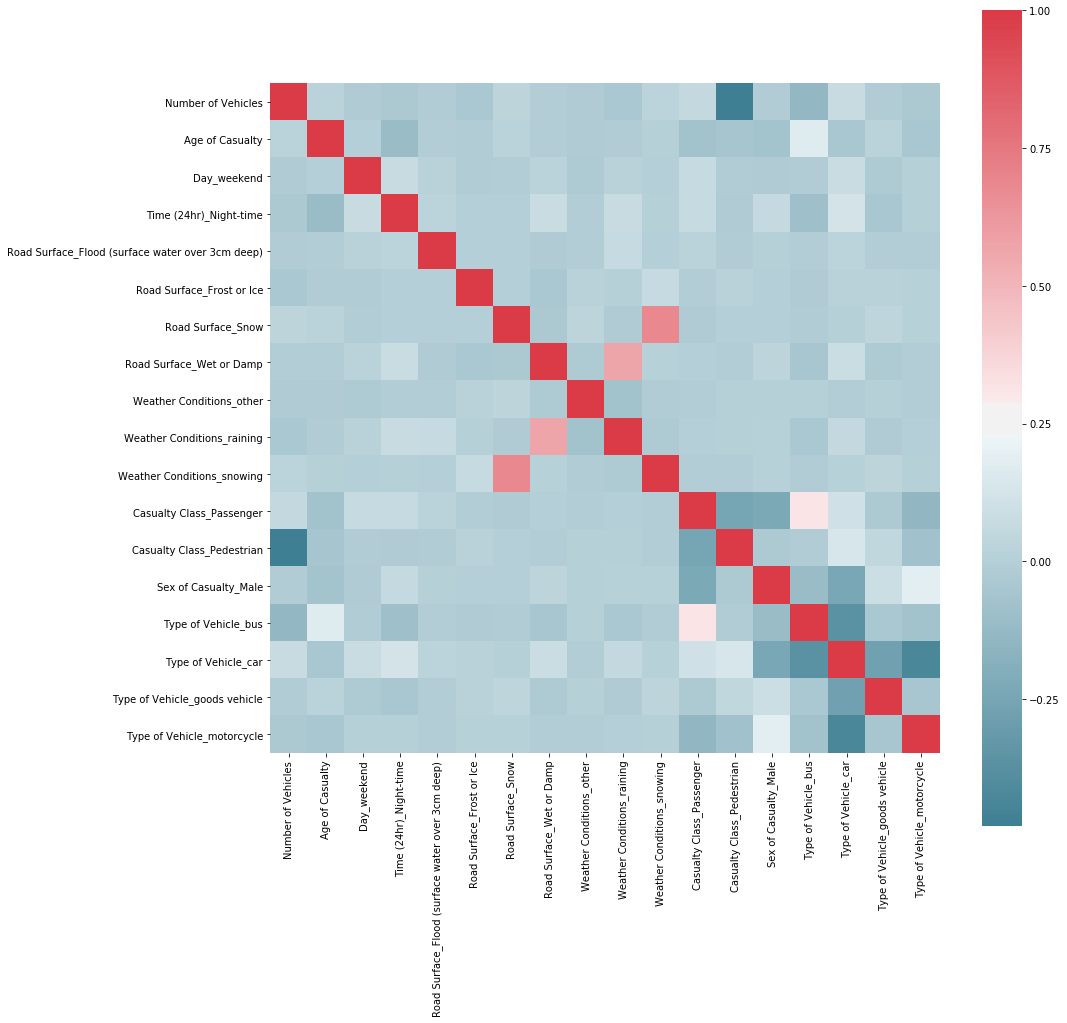

In [145]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 15))
corr = X_3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [144]:
X_4 = X_3.drop(['Road Surface_Flood (surface water over 3cm deep)',
 'Road Surface_Frost or Ice',
 'Road Surface_Snow',
 'Road Surface_Wet or Damp'], axis=1)

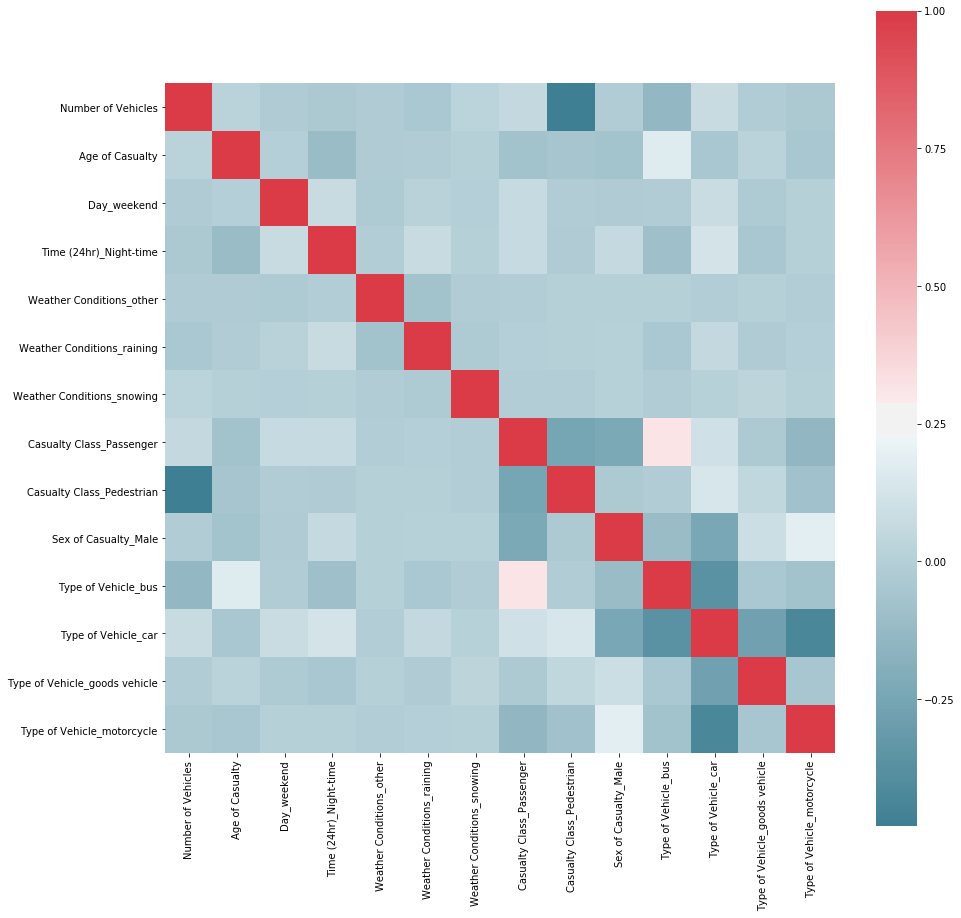

In [146]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 15))
corr = X_4.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [147]:
lr = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_4, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
results2 = cross_val_score(lr, X_4, y, cv=kfold)

In [149]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results2.mean()*100, results2.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 86.84% (standard deviation 1.19%)


In [150]:
coef = lr.coef_[0]
table = [coef]
display(HTML(tabulate.tabulate(table, headers=list(X_4), tablefmt='html')))

Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Weather Conditions_other,Weather Conditions_raining,Weather Conditions_snowing,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle
-0.361811,0.0289352,0.132443,0.837443,-0.665629,0.578894,-1.60869,0.138101,0.922844,1.05184,-1.09542,-0.832933,-0.631747,0.135739


## SUMMARY 

In [171]:
from IPython.display import HTML, display
import tabulate
table = [["Random Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["Neural Network","results.mean()*100","results.std()*100"],
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)],
         ["Logistic Regression with PCA", round(results1.mean()*100,2) , round(results1.std()*100,2)],
         ["Logistic Regression without PCA", round(results2.mean()*100,2) , round(results2.std()*100,2)]]
display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Random Tree,87.02,1.22
Neural Network,results.mean()*100,results.std()*100
KNN,86.97,1.02
Logistic Regression with PCA,86.85,1.24
Logistic Regression without PCA,86.84,1.19
